In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

In [19]:
df = pd.read_csv('Country-data.csv')
df.drop('country',axis=1,inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [20]:
x = df.values
x

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]],
      shape=(167, 9))

In [21]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

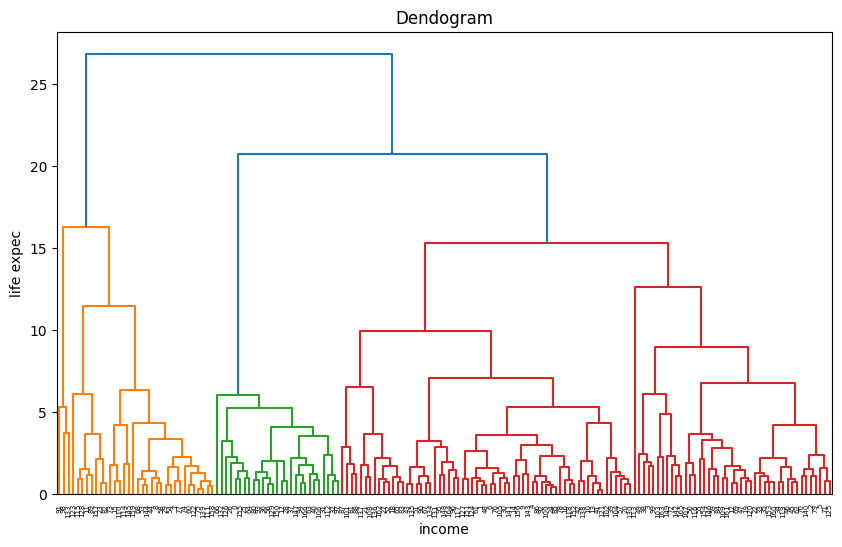

In [22]:
linked = linkage(x_scaled, method = 'ward')


plt.figure (figsize = (10,6))
dendrogram(linked)
plt.title("Dendogram")
plt.xlabel("income")
plt.ylabel("life expec")
plt.show()

In [23]:
model = AgglomerativeClustering(n_clusters = 2, linkage= 'ward')

labels = model.fit_predict(x_scaled)

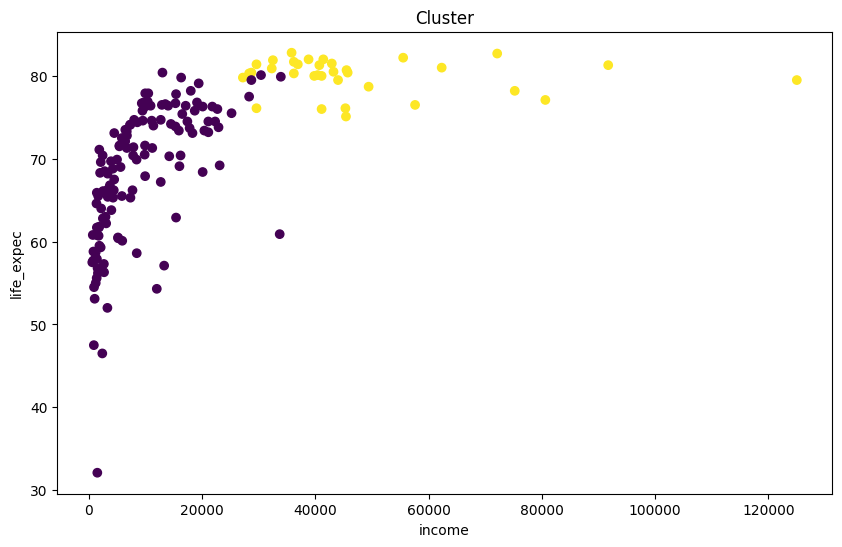

In [24]:
plt.figure (figsize = (10,6))
plt.scatter(df['income'],df['life_expec'],c= labels)
plt.title('Cluster')
plt.xlabel("income")
plt.ylabel("life_expec")
plt.show()